In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
import lightgbm as lgb


In [4]:
grid_df=pd.read_csv("Data_for_UCI_named.csv")

In [5]:
grid_df=grid_df.drop(['stab'],axis=1)

In [6]:
grid_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [7]:
grid_df["stabf"].replace({"unstable": 0, "stable": 1}, inplace=True)

Unstable as 0, Stable as 1

In [8]:
grid_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0


In [9]:
grid_df["stabf"].value_counts()

0    6380
1    3620
Name: stabf, dtype: int64

In [10]:
X=grid_df.drop(['stabf'],axis=1)
Y=grid_df['stabf']

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20, random_state=1)

In [12]:
X_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,6.255995,2.542401,7.024714,9.476518,3.529888,-1.224881,-0.688228,-1.616780,0.568221,0.618403,0.685739,0.660088
5140,5.070581,5.490253,8.075688,0.761075,4.220888,-1.280596,-1.902185,-1.038107,0.443515,0.097244,0.916955,0.129254
2568,1.220072,8.804028,3.874283,8.433949,3.614027,-1.039236,-0.953566,-1.621224,0.908353,0.923594,0.238881,0.660156
3671,7.498402,6.697603,8.798626,2.126236,3.134585,-1.581906,-0.589386,-0.963293,0.260826,0.899003,0.964752,0.600598
7427,7.074006,1.337511,6.100756,7.759156,2.526922,-0.922540,-0.632600,-0.971782,0.984580,0.716082,0.836928,0.165162
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,9.504984,5.265415,2.029617,8.026334,3.449756,-0.922754,-1.526305,-1.000696,0.191864,0.611297,0.080008,0.350312
7813,8.035818,4.632548,1.177810,1.204950,4.093208,-1.568218,-0.819966,-1.705024,0.223384,0.317770,0.726623,0.441620
905,7.052560,3.264057,1.405949,4.497549,3.741358,-0.629026,-1.407945,-1.704387,0.868306,0.605566,0.100591,0.747320
5192,5.085242,1.790031,2.486392,2.848192,3.159670,-0.892898,-1.025461,-1.241311,0.473917,0.418512,0.326253,0.982488


In [13]:
Y_train

2694    0
5140    0
2568    0
3671    0
7427    0
       ..
2895    1
7813    1
905     0
5192    0
235     1
Name: stabf, Length: 8000, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)


array([[ 0.36732671, -0.98604156,  0.65044706, ...,  0.33985949,
         0.58556788,  0.49223946],
       [-0.06465869,  0.08943734,  1.03507899, ..., -1.5584875 ,
         1.42964862, -1.44352101],
       [-1.46785   ,  1.29841758, -0.50253617, ...,  1.45153362,
        -1.04574277,  0.49248925],
       ...,
       [ 0.65760851, -0.72275633, -1.4058879 , ...,  0.29310048,
        -1.55058661,  0.81034412],
       [-0.05931596, -1.26053241, -1.01047147, ..., -0.38825455,
        -0.72678059,  1.66791568],
       [-1.47321368,  0.63843757,  0.25012249, ..., -1.17410957,
         1.179282  ,  0.78362657]])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_test)

array([[ 0.59216281, -0.42056489,  1.47247233, ...,  1.17528683,
        -1.49264423,  1.08629139],
       [ 0.19918339,  0.36454311, -0.19007599, ..., -0.39594869,
         1.41270302,  1.2275355 ],
       [-1.08603505, -0.32183365, -0.87350524, ..., -1.44437004,
         0.65421559, -1.67979856],
       ...,
       [ 0.94713772, -1.66831304, -1.62907667, ...,  0.12889933,
         0.57628587,  1.32084757],
       [-1.12735376,  0.18457336, -0.23820702, ...,  0.80017191,
        -1.3484627 , -0.79985771],
       [-1.38555998,  1.49904306,  0.27297057, ..., -0.92058109,
         0.00903865,  1.19055888]])

In [16]:
RFC = RandomForestClassifier(random_state=1)
RFCmodel=RFC.fit(X_train,Y_train)
y_pred=RFCmodel.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1288
           1       0.93      0.87      0.90       712

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9295

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

In [19]:
ETC = ExtraTreesClassifier()
ETCmodel=ETC.fit(X_train,Y_train)
y_pred=ETCmodel.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1288
           1       0.96      0.82      0.88       712

    accuracy                           0.92      2000
   macro avg       0.93      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
ETC = ExtraTreesClassifier( random_state = 1)

In [22]:
ETCmodel=ETC.fit(X_train,Y_train)

In [23]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': (4,8,100,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    
    #
    'min_samples_split': (0.01, 0.199,.4,.7)
}

In [24]:
cv=RandomizedSearchCV(estimator=ETCmodel,param_distributions=model_params,  random_state = 1 )

In [25]:
cvs=cv.fit(X_train,Y_train)

In [26]:
y_pred=cvs.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1288
           1       0.97      0.71      0.82       712

    accuracy                           0.89      2000
   macro avg       0.92      0.85      0.87      2000
weighted avg       0.90      0.89      0.88      2000



Feature: 0, Score: 0.11740
Feature: 1, Score: 0.11844
Feature: 2, Score: 0.11317
Feature: 3, Score: 0.11547
Feature: 4, Score: 0.03951
Feature: 5, Score: 0.04037
Feature: 6, Score: 0.04071
Feature: 7, Score: 0.04058
Feature: 8, Score: 0.08978
Feature: 9, Score: 0.09368
Feature: 10, Score: 0.09688
Feature: 11, Score: 0.09402


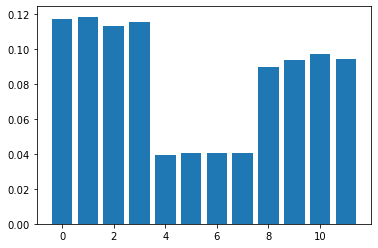

In [27]:
importance = ETCmodel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [29]:
from xgboost import XGBClassifier


In [30]:
XGB = XGBClassifier(random_state=1)
XGBmodel=XGB.fit(X_train,Y_train)
y_pred=XGBmodel.predict(X_test)
print(classification_report(Y_test,y_pred))

C:\Users\shilp\anaconda3\envs\symbihello\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1288
           1       0.94      0.91      0.92       712

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9455

In [32]:
model = lgb.LGBMClassifier(random_state=1)
model.fit(X_train,Y_train)
y_pred=XGBmodel.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1288
           1       0.94      0.91      0.92       712

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9455